Aldrich Gwynne, Brittany Contreras, Chloe David, Marisol Lopez, Minki Shin

Marianne Choi

In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import *

In [2]:
cigs_np = Table().read_table("cigs.csv")
cigs_np

Brand_Name | flavor | CO   | nic  | tar  | size | filter | pack | menthol
Alpine     | nan    | 15   | 1.1  | 16   | 100  | F      | SP   | yes
Alpine     | Lt     | 12   | 0.8  | 10   | 100  | F      | SP   | yes
Alpine     | nan    | 15   | 1.1  | 16   | King | F      | HP   | yes
Alpine     | Lt     | 11   | 0.7  | 10   | King | F      | HP   | yes
Alpine     | nan    | 16   | 1    | 16   | King | F      | SP   | yes
Alpine     | Lt     | 10   | 0.7  | 9    | King | F      | SP   | yes
American   | FF     | 16   | 0.9  | 14   | 100  | F      | SP   | no
American   | Lt     | 13   | 0.7  | 10   | 100  | F      | SP   | no
American   | Lt     | 11   | 0.7  | 9    | King | F      | HP   | no
American   | FF     | 15   | 0.9  | 15   | King | F      | SP   | no
... (1115 rows omitted)

In [3]:
cigs_pd = pd.read_csv("cigs.csv")

In [4]:
cigs_pd.head(5)

Brand_Name flavor  CO  nic   tar  size filter pack menthol
0    Alpine     NaN  15  1.1  16.0   100      F   SP     yes
1    Alpine      Lt  12  0.8  10.0   100      F   SP     yes
2    Alpine     NaN  15  1.1  16.0  King      F   HP     yes
3    Alpine      Lt  11  0.7  10.0  King      F   HP     yes
4    Alpine     NaN  16  1.0  16.0  King      F   SP     yes

In [5]:
cigs_np.show(5)

> overarching q: what is the correlation between amounts of nicotine and tar in cigarettes (menthol & non-menthol) & CO output; possible a/b testing w menthol vs non-menthol, maybe filters also

Possibly adding another dataset that examines the effects/output of nicotine into the environment. --> Trying to see where/what is affected and how certain chemicals/attributes of nicotine devices impact the environment as well.

Possibly add KNN classification model for menthol.

In [6]:
top_brands = cigs_np.group("Brand_Name").sort("count", descending=True)
top5_brands = top_brands.take(np.arange(5))
top5_brands
#the top five brands are Marlboro, Merit, Benson & Hedges, GPC, Virginia Slims

Brand_Name       | count
Marlboro         | 38
Merit            | 24
Benson & Hedges  | 21
GPC              | 18
Virginia Slims   | 17

In [7]:
cigs_top_brands = cigs_np.where("Brand_Name" , are.containing ("Marlboro") )
cigs_top_brands

Brand_Name | flavor   | CO   | nic  | tar  | size | filter | pack | menthol
Marlboro   | GoldPkg  | 15   | 1.1  | 15   | 100  | F      | HP   | no
Marlboro   | GoldPkg  | 15   | 1.1  | 15   | 100  | F      | HP   | no
Marlboro   | RedPkg   | 14   | 1.1  | 15   | 100  | F      | HP   | no
Marlboro   | Lt       | 13   | 0.8  | 10   | 100  | F      | HP   | no
Marlboro   | Lt       | 12   | 0.8  | 10   | 100  | F      | HP   | yes
Marlboro   | Medium   | 14   | 1    | 13   | 100  | F      | HP   | no
Marlboro   | Ultra-Lt | 8    | 0.5  | 6    | 100  | F      | HP   | no
Marlboro   | GoldPkg  | 16   | 1.2  | 16   | 100  | F      | SP   | no
Marlboro   | GoldPkg  | 16   | 1.2  | 16   | 100  | F      | SP   | no
Marlboro   | RedPkg   | 16   | 1.2  | 16   | 100  | F      | SP   | no
... (28 rows omitted)

In [8]:
#ultra light cigarettes have 7mg or less and are thought to be "healthier" 
#than light or full flavor cigarettes
cigs_np.where("tar", are.below(7))
def ultralight_label(x):
    """Return the label for an input tar x"""
    if  x <= 7:
        return 'ultralight'
    else:
        return 'other'

ul_array = cigs_np.apply(ultralight_label, "tar")
ultralight = cigs_np.with_columns("ultralight", ul_array)
ultralight_grouped = ultralight.group("ultralight", np.mean)
ultralight_grouped

ultralight | Brand_Name mean | flavor mean | CO mean | nic mean | tar mean | size mean | filter mean | pack mean | menthol mean
other      |                 |             | 14.078  | 0.848791 | 12.5692  |           |             |           |
ultralight |                 |             | 6.51163 | 0.367442 | 4.46744  |           |             |           |

In [9]:
#is there a difference in distribution of CO between ultralight and non-ultralight cigarettes?
ultralight.hist("CO", group="ultralight")

In [10]:
def test_statistic(tbl):
    "difference of means between ultralight and other"
    means_grp = tbl.group("ultralight", np.mean)
    means = means_grp.column("CO mean")
    return means.item(1) - means.item(0)

observed_statistic1 = test_statistic(ultralight)
observed_statistic1

-7.5663940710452335

In [11]:
def simulate_test_statistic():
    shuffled_labels = ultralight.sample(with_replacement=False).column("ultralight")
    ultralight_shuffled = ultralight.select("CO").with_column("ultralight", shuffled_labels)
    return test_statistic(ultralight_shuffled)

simulate_test_statistic()

-0.4420649118323521

In [12]:
simulated_statistics = make_array()

reps = 5000
for i in np.arange(reps):
    one_difference = simulate_test_statistic()
    simulated_statistics = np.append(simulated_statistics, one_difference)

Table().with_column('Difference Between Means', simulated_statistics).hist()
plt.scatter(observed_statistic1, 0, c="r", s=50);

KeyboardInterrupt: 

In [0]:
p_value1 = np.count_nonzero(simulated_statistics <= observed_statistic1)/reps
p_value1

In [0]:
cigs_np.select("nic", 'tar', "CO")

In [15]:
menthol = cigs_np.select(2, 8)
menthol

CO   | menthol
15   | yes
12   | yes
15   | yes
11   | yes
16   | yes
10   | yes
16   | no
13   | no
11   | no
15   | no
... (1115 rows omitted)

In [16]:
cigs_np.where("Brand_Name", are.contained_in(top5_brands.column(0))).hist("nic", group = "Brand_Name")

In [17]:
cigs_np.group("menthol")

menthol | count
no      | 752
yes     | 373

Null Hypothesis: In the population, there is no difference in the distribution of emissions of CO between menthol and non-menthol cigarettes. Any differences in the sample are due to chance.

Alternative Hypothesis: Any observed differences in the sample are due to random variation and not to any true difference between the two populations.

In [13]:
cigs_np.hist("CO", group = "menthol")

In [18]:
def test_stat(tbl):
    "difference of means between non-menthol and menthol"
    means_grp = tbl.group("menthol", np.mean)
    means = means_grp.column("CO mean")
    return means.item(0) - means.item(1)

observed_statistic = test_stat(menthol)
observed_statistic

-0.5906394387085747

In [19]:
def simulate_test_stat():
    shuffled_labels = menthol.sample(with_replacement=False).column("menthol")
    menthol_shuffled = menthol.select("CO").with_column("menthol", shuffled_labels)
    return test_stat(menthol_shuffled)

simulate_test_stat()

-0.21362871484798518

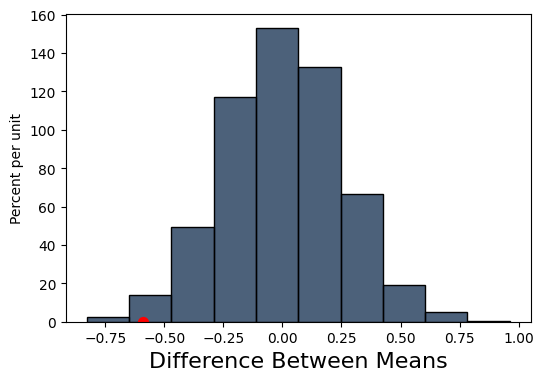

In [22]:
simulated_stats = make_array()

reps = 5000
for i in np.arange(reps):
    one_difference = simulate_test_stat()
    simulated_stats = np.append(simulated_stats, one_difference)

Table().with_column('Difference Between Means', simulated_stats).hist()
plt.scatter(observed_statistic, 0, c="r", s=50);

In [0]:
p_value = np.count_nonzero(simulated_stats <= observed_statistic)/reps
p_value

In [0]:
sns.histplot(data=cigs_pd,x="tar", hue="menthol")

In [0]:
hist = cigs_np.hist("CO", group = "menthol")

https://www.cdc.gov/tobacco/basic_information/health_effects/index.htm

https://www.ftc.gov/system/files/ftc_gov/pdf/p114508cigarettereport2021.pdf

https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking/index.htm

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f377b59-0c43-4dfd-9ffa-5c8786e4d215' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>